In [1]:
import os
path_pipest = os.path.abspath('./')
n=0
while (not os.path.basename(path_pipest)=='pipest') and (n<6):
    path_pipest=os.path.dirname(path_pipest)
    n+=1 
if not os.path.basename(path_pipest)=='pipest':
    raise ValueError("path_pipest not found. Instead: {}".format(path_pipest))
path_sdhawkes=path_pipest+'/sdhawkes'
path_lobster=path_pipest+'/lobster'
path_lobster_data=path_lobster+'/data'
path_lobster_pyscripts=path_lobster+'/py_scripts'
path_models=path_pipest+'/models'
path_tests=path_pipest+'/tests'
path_saved_tests=path_tests+'/saved_tests'

In [2]:
import time
import sys
sys.path.append(path_sdhawkes+'/resources/')
sys.path.append(path_sdhawkes+'/modelling/')
sys.path.append(path_lobster_pyscripts+'/')

In [3]:
import pickle
import numpy as np
import pandas as pd

In [4]:
# import model as sd_hawkes_model
# import lob_model
# import computation
# import simulation
# import goodness_of_fit
# import mle_estimation as mle_estim
# import uncertainty_quant

In [5]:
symbol = "INTC"
date = "2019-01-23"
time_window = "37800-41400"

In [6]:
# with open(path_models+'/{}/{}_{}/{}_sdhawkes_{}_{}'.format(symbol, symbol, date,symbol, date, time_window),'rb') as source:
#         model=pickle.load(source)
try:
    with open(path_models+'/{}/{}_sdhawkes_{}_{}'.format(symbol, symbol, date, time_window),'rb') as source:
        model=pickle.load(source)
except FileNotFoundError:
    with open(path_models+'/{}/{}_{}/{}_sdhawkes_{}_{}'.format(symbol, symbol, date, symbol, date, time_window),'rb') as source:
        model=pickle.load(source)
print(model.name_of_model)
print('Date and time of initilisation: {}'.format(model.datetime_of_initialisation))
print('number_of_event_types: {}; number_of_states: {}'.format(
    model.number_of_event_types, model.number_of_states))
print('Dimension of dataset: {}'.format((model.data.messagefile.shape)))

openmp.omp_get_max_threads(): 4
INTC_sdhawkes_2019-01-23_37800-41400
Date and time of initilisation: 2020-04-22 09:10:18.039305
number_of_event_types: 4; number_of_states: 15
Dimension of dataset: (153157, 10)


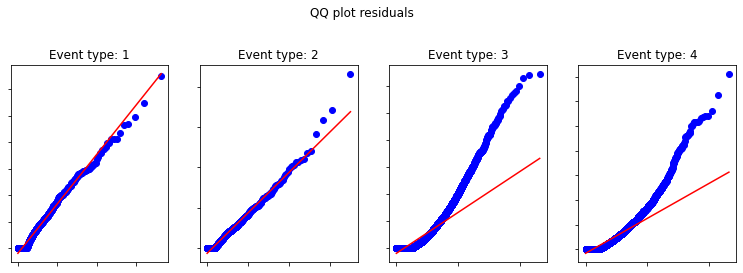

Anderson-Darling test to check distribution of residuals
Null hypothesis is "expon" 
Significance levels: [15.  10.   5.   2.5  1. ]
Critical values: [0.921 1.077 1.34  1.605 1.956]
event type=0, ad_stat: 639.3417062716699
event type=1, ad_stat: 386.8132989482999
event type=2, ad_stat: 149510.40658142994
event type=3, ad_stat: 123970.19782233369
None


In [7]:
model.goodness_of_fit.qq_plot_residuals(index_of_first_event_type=1)
print(model.goodness_of_fit.ad_test_on_residuals())

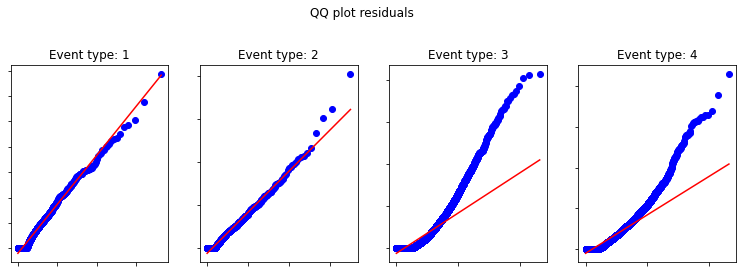

Anderson-Darling test to check distribution of residuals
Null hypothesis is "expon" 
Significance levels: [15.  10.   5.   2.5  1. ]
Critical values: [0.921 1.077 1.34  1.605 1.956]
event type=0, ad_stat: 643.4350538655551
event type=1, ad_stat: 382.72480682815444
event type=2, ad_stat: 155077.342719928
event type=3, ad_stat: 114797.64179786219
None


In [8]:
model.mle_estim.goodness_of_fit.qq_plot_residuals(index_of_first_event_type=1)
print(model.mle_estim.goodness_of_fit.ad_test_on_residuals())

In [9]:
print(model.inflationary_pressure)
print(model.deflationary_pressure)
print(model.inflationary_pressure-model.deflationary_pressure)

[0.         0.63034963 3.92217547 0.         0.         0.
 0.35699913 2.02502673 3.40032573 5.27217147 0.         0.9627158
 4.32435861 4.70661056 0.        ]
[0.         7.99982277 9.31490751 1.18747369 0.         2.27663342
 1.60754363 1.31081846 0.18350117 0.         0.         2.27721325
 2.36877869 0.         0.        ]
[ 0.         -7.36947314 -5.39273204 -1.18747369  0.         -2.27663342
 -1.25054449  0.71420826  3.21682456  5.27217147  0.         -1.31449745
  1.95557992  4.70661056  0.        ]


In [10]:
model.set_transition_probabilities(model.transition_probabilities)

17 state-event pairs are not associated with a distribution of state updates
Transition probabilities have been set. Price Asymmetry = 9.820926060249056


In [9]:
# model.nonparam_estim.goodness_of_fit.qq_plot_residuals(index_of_first_event_type=1)
# print(model.nonparam_estim.goodness_of_fit.ad_test_on_residuals())

In [10]:
# minim=model.mle_estim.results_of_estimation[3].get("MinimisationProcedure")
# minim.results

In [11]:
print(model.base_rates)
print(model.mle_estim.base_rates)

[ 0.25291572  0.23738812 53.9994957  39.26748431]
[ 0.2694138   0.22089004 69.6522578  23.61472221]


In [12]:
rho_max=0.0
for x in range(model.number_of_states):
    vals=(np.linalg.eigvals(model.impact_decay_ratios[:,x,:]))
    rho_max=max(rho_max,np.abs(np.amax(vals)))
#     print(model.impact_decay_ratios[:,x,:])
    print("x={}, max_L1norm={}, rho={}".format(x,np.amax(model.impact_decay_ratios[:,x,:]),np.amax(vals)))
print("rho_max={}".format(rho_max))    

x=0, max_L1norm=0.4508986860218672, rho=0.45089888480253404
x=1, max_L1norm=0.4517428073738579, rho=0.4517429914559376
x=2, max_L1norm=0.4555794761816968, rho=0.45557964878016927
x=3, max_L1norm=0.4567429120808314, rho=0.4567430814639335
x=4, max_L1norm=0.45129349895908355, rho=0.45129368494315913
x=5, max_L1norm=0.4647367321957015, rho=0.46473689125865497
x=6, max_L1norm=0.5003722684818417, rho=0.5003724026962492
x=7, max_L1norm=0.40368008143524997, rho=0.40368121737672624
x=8, max_L1norm=0.4597635568761918, rho=0.4739631252636769
x=9, max_L1norm=0.455629257909159, rho=0.485128484416671
x=10, max_L1norm=0.4508701077087545, rho=0.4508703460392065
x=11, max_L1norm=0.4508701077087545, rho=0.45087033877315713
x=12, max_L1norm=0.45086555611940277, rho=0.4508657678435226
x=13, max_L1norm=0.4508701077087545, rho=0.4508702968882165
x=14, max_L1norm=0.4508701077087545, rho=0.4508702957482225
rho_max=0.5003724026962492


In [13]:
# model.mle_estim.dirichlet_param

In [14]:
# model.impact_coefficients

In [15]:
e1=1
e=0
model.decay_coefficients[e1,:,e]

array([2.86552587, 2.86518961, 2.86563155, 2.86552211, 2.86525005,
       2.86525388, 2.86593687, 2.867829  , 2.923864  , 2.8651579 ,
       2.86514259, 2.86632895, 2.95233762, 2.87496703, 2.8656014 ])

In [16]:
model.impact_decay_ratios[e1,:,e]

array([5.36041884e-08, 5.36138521e-08, 6.52662182e-05, 5.36042964e-08,
       2.62616521e-04, 1.04470250e-04, 5.35923813e-08, 1.31672165e-02,
       5.75503793e-02, 5.36147638e-08, 5.36152038e-08, 7.42996338e-03,
       8.34402377e-02, 3.56971847e-02, 6.71758280e-06])

In [17]:
np.amin(model.decay_coefficients)

2.008820632198759

In [18]:
e=3
print(np.amax(model.impact_decay_ratios[:,:,e]))
print(np.amin(model.impact_decay_ratios[:,:,e]))
print(np.mean(model.impact_decay_ratios[:,:,e]))

0.4501485033968599
6.179393498688766e-08
0.2280314079592901


In [19]:
x=2
np.linalg.eigvals(model.impact_decay_ratios[:,x,:])

array([9.29292416e-08, 2.46658291e-01, 3.98635593e-01, 4.55579649e-01])

In [20]:
model.inflationary_pressure

array([0.        , 0.63034963, 3.92217547, 0.        , 0.        ,
       0.        , 0.35699913, 2.02502673, 3.40032573, 5.27217147,
       0.        , 0.9627158 , 4.32435861, 4.70661056, 0.        ])

In [21]:
model.deflationary_pressure

array([0.        , 7.99982277, 9.31490751, 1.18747369, 0.        ,
       2.27663342, 1.60754363, 1.31081846, 0.18350117, 0.        ,
       0.        , 2.27721325, 2.36877869, 0.        , 0.        ])

In [22]:
model.impact_coefficients

array([[[2.16356492e-04, 1.00000000e-07, 1.00000000e-07, 3.42795423e-04],
        [1.00000000e-07, 1.00000000e-07, 1.00000000e-07, 1.00000000e-07],
        [1.00000000e-07, 1.00000000e-07, 1.00000000e-07, 1.00000000e-07],
        [1.15286781e-02, 5.25891402e-02, 1.00000000e-07, 1.00000000e-07],
        [1.07964760e-04, 7.50175112e-05, 1.00000000e-07, 1.00000000e-07],
        [1.00000000e-07, 1.00000000e-07, 1.00000000e-07, 1.00000000e-07],
        [1.00000000e-07, 1.00000000e-07, 1.00000000e-07, 1.00000000e-07],
        [2.52326623e-01, 1.00000000e-07, 1.00000000e-07, 1.00000000e-07],
        [5.01598276e-02, 1.00000000e-07, 1.00000000e-07, 1.00000000e-07],
        [1.89335078e-04, 1.02472624e-04, 1.00000000e-07, 2.66920697e-04],
        [9.78721572e-05, 1.00000000e-07, 1.00000000e-07, 1.00000000e-07],
        [8.67755705e-05, 1.00000000e-07, 1.00000000e-07, 1.95783876e-04],
        [1.00000000e-07, 1.00000000e-07, 1.00000000e-07, 2.42255575e-04],
        [1.00000000e-07, 3.66795645e-0

In [23]:
model.transition_probabilities

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00